## Santander Customer Satisfaction

This is a [kaggle competition](https://www.kaggle.com/c/santander-customer-satisfaction), the project description is as follows:
From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

Santander Bank is asking kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.

In this competition, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.
### Evaluation 
The metric used in this competition is [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

### Strategy for challenging this competition
- First, data exploration will be carried out to better understand data and some basic statistics will be carried out.
- Data visualizations will be carried on the data with aim to better understand how some features relates to the target.
- Data preprocessing will be carried out where by constant columns and duplicates will be removed, kmeans clustering will also be performed on the data to cluster data based on similarities between them and this feature will be added to the data.Also, data will be split into training and validation sets.
- Supervised learning will be apply on the data to predict the "TARGET" column and  evaluation will be carried out based on the metric given by the competition.
- Refinement will be carried out to improve the metric.
- Using a techinique called permutation importance will be used to display the most important featues in detrmining prediction.

In [22]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.cluster import KMeans 
import lightgbm as lgbm
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Data Exploration

In [23]:
# Loading train and test data
df = pd.read_csv('all/train.csv')
df_test = pd.read_csv('all/test.csv')

In [24]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [25]:
df.shape

(76020, 371)

In [26]:
# Checking for null values
li = df.isnull().sum().values
li   

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [27]:
df["TARGET"].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [28]:
# happy customers have TARGET==0, unhappy custormers have TARGET==1
# A little less then 4% are unhappy => unbalanced dataset
df1 = pd.DataFrame(df.TARGET.value_counts())
df1['Percentage'] = 100*df1['TARGET']/df.shape[0]
df1

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


From the data exploration,The following can be  noticed:
- The training data contains no null values.
- There the percentage of satisfied clients is 96% while that of unsatisied clients is 4%, which is not which make target variable unequally distributed. 

### Data Visualization

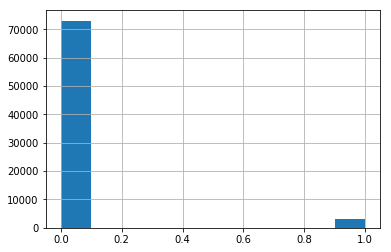

In [29]:
# Visualizing proportion of target values using a histogram
df['TARGET'].hist();

This diagram represents the distribution of the “TARGET” column. 96% of customers are satisfied and only 4% are not.

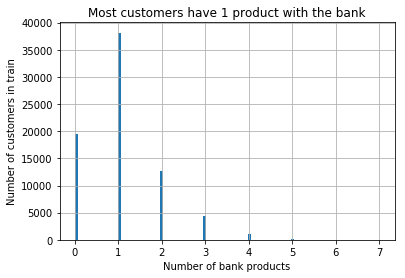

In [30]:
# According to dmi3kno (see https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/comments#115223)
# num_var4 is the number of products. Let's plot the distribution:
df.num_var4.hist(bins=100)
plt.xlabel('Number of bank products')
plt.ylabel('Number of customers in train')
plt.title('Most customers have 1 product with the bank')
plt.show()

As we can observe from the graph by the side we see that the highest proportion of customers have just one product with the bank.

c:\users\boss\anaconda3\anaconda\envs\kaggle1\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


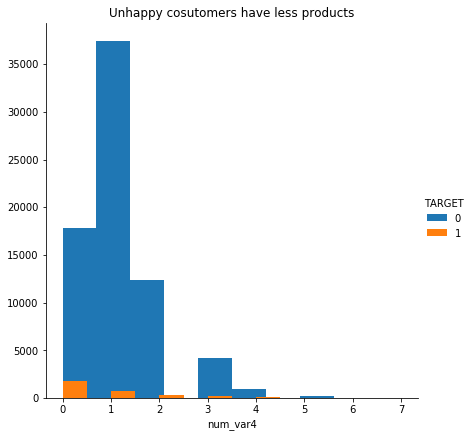

In [31]:
# Let's look at the density of the of happy/unhappy customers in function of the number of bank products
sns.FacetGrid(df, hue="TARGET", size=6) \
   .map(plt.hist, "num_var4") \
   .add_legend()
plt.title('Unhappy cosutomers have less products')
plt.show()

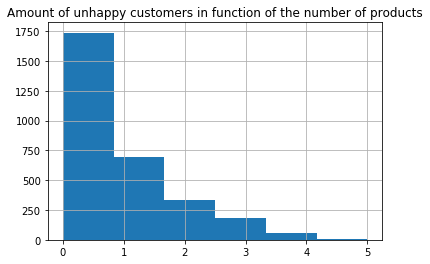

In [32]:
df[df.TARGET==1].num_var4.hist(bins=6)
plt.title('Amount of unhappy customers in function of the number of products');

c:\users\boss\anaconda3\anaconda\envs\kaggle1\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


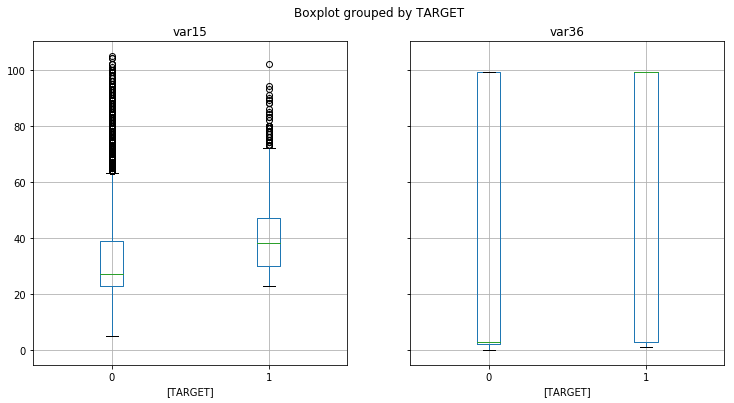

In [33]:
df[['var15','var36','TARGET']].boxplot(by="TARGET", figsize=(12, 6));

c:\users\boss\anaconda3\anaconda\envs\kaggle1\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


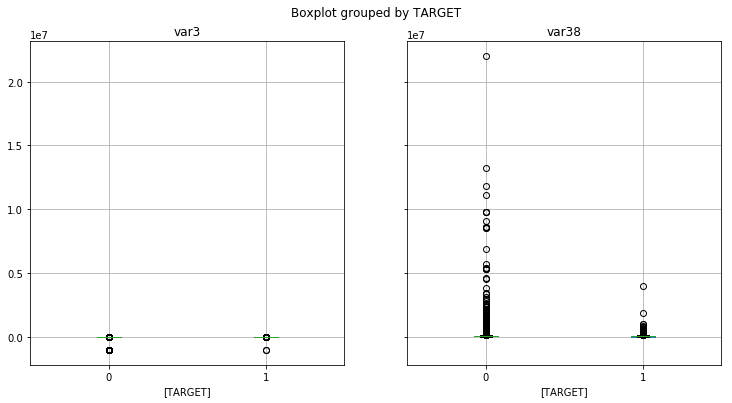

In [34]:
df[['var3','var38','TARGET']].boxplot(by="TARGET", figsize=(12, 6));

### Data Preprocessing
Preprocessing involves the following steps:
- Removing constant columns ( columns whose standard deviation is 0)
- From then, remove duplicated columns 
- split the data into training data, training label and test data
- Use unsupervised learning (K-means clustering) to cluster the data based on smilarity between features and add them to the train and test data 

In [53]:
def preprocess(df,df_test):
    
        
    """clean and split data
    Args:
        df: Training data.
        df_test: Testing data
    Returns:
        X: Features for modeling.
        Y: Labels for model.
        test: test features for modeling.
        test_id: test id's
    """


    # remove constant columns (std = 0)
    remove = []
    
    for col in df.columns:
        
        if df[col].std() == 0:
            remove.append(col)

    df.drop(remove, axis=1, inplace=True)
    df_test.drop(remove, axis=1, inplace=True)

    # remove duplicated columns
    remove = []
    cols = df.columns
    for i in range(len(cols)-1):
        v = df[cols[i]].values
        for j in range(i+1,len(cols)):
            if np.array_equal(v,df[cols[j]].values):
                remove.append(cols[j])

    df.drop(remove, axis=1, inplace=True)
    df_test.drop(remove, axis=1, inplace=True)

# split data into train and test
    test_id = df_test.ID
    
    test = df_test.drop(["ID"],axis=1)
    
    X = df.drop(["TARGET","ID"],axis=1)
    y = df.TARGET.values
    return X, y, test , test_id
X, y, test , test_id = preprocess(df,df_test)

In [36]:
#  Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)

# use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X) 
pred_test = kmeans_1.fit_predict(test) 

In [37]:
df_test['preditions'] = pred_test

In [38]:
X['preditions'] = predictions

### Initial model


In [39]:
# making test - valid sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
     'metric': 'auc'}


    
# making lgbm datasets for train and valid
d_train = lgbm.Dataset(X_train, y_train)
d_valid = lgbm.Dataset(X_test, y_test)
    
# training with early stop
bst = lgbm.train(params, d_train, 5000,  valid_sets=[d_valid], verbose_eval=50, early_stopping_rounds=100) 
    
# making prediciton for one column

print('Fininshed Training')


Training until validation scores don't improve for 100 rounds.
[50]	valid_0's auc: 0.83736
[100]	valid_0's auc: 0.833161
[150]	valid_0's auc: 0.830078
Early stopping, best iteration is:
[61]	valid_0's auc: 0.839646
Fininshed Training


### Final Model

In [40]:
# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
    'num_leaves' : 76,
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'auc',
    'max_depth':5
}

In [41]:
# making lgbm datasets for train and valid
d_train = lgbm.Dataset(X_train, y_train)
d_valid = lgbm.Dataset(X_test, y_test)
    
    # training with early stop
bst = lgbm.train(params, d_train, 5000,  valid_sets=[d_valid], verbose_eval=50, early_stopping_rounds=100) 
    
    # making prediciton for one column

print('Fininshed Training')

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's auc: 0.840325
[100]	valid_0's auc: 0.837502
[150]	valid_0's auc: 0.831955
Early stopping, best iteration is:
[58]	valid_0's auc: 0.841805
Fininshed Training


Initially, I splitted the data into training and validation data to evaluate how well metric performed
- Then, I used lightgbm as supervised learning model
- Initial model consists of mainly default parameters, the main thing I modified was the metric to "auc" and also precised the objective which is binary classification.early stopping was used to monitor training.
- Best validation auc for the initial model gave a value of 0.839646
- Then I tuned a few parameters, The parameters tuned are as follows:
num_leaves = 76,
bagging_fraction= 0.8,
bagging_freq=1,
boosting_type=gbdt,
max_depth=5
- Best validation auc for the tuned model gave a value of 0.841805



In [46]:
# Using permutation importance to know the most relevant features for prediction
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier

my_model = RandomForestClassifier(random_state=0).fit(X_train, y_train)

perm = PermutationImportance(my_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0010 ± 0.0021,var15
0.0004 ± 0.0015,var38
0.0003 ± 0.0003,saldo_var37
0.0002 ± 0.0004,num_op_var41_ult1
0.0001 ± 0.0000,saldo_medio_var8_ult3
0.0001 ± 0.0005,num_op_var41_efect_ult3
0.0001 ± 0.0002,imp_op_var39_comer_ult1
0.0001 ± 0.0003,num_op_var41_hace2
0.0001 ± 0.0003,ind_var37_0
0.0001 ± 0.0001,num_op_var41_ult3


In [42]:
pred =  bst.predict(test)

In [120]:
# making submission..!!

col = ["TARGET"]
subm = pd.read_csv('all/sample_submission.csv')
submid = pd.DataFrame({'ID': subm["ID"]})
submission = pd.concat([submid, pd.DataFrame(pred, columns = col)], axis=1)
submission.to_csv('submission_001.csv', index=False)

### Conclusion

The main challenge in this project I faced was tuning parameters for lighgbm. Lightgbm has a lot of parameters and finding the optimal parameter is not easy,There are improvements that could be done with the predicting model. For example, I could try some ensemble and stacking method to build more stronger model based on weak learners (such as different gradient boosting tree algorithms, neural network, linear regression ).